In [8]:
!pip install pmdarima

In [9]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [10]:
def load_data(ETF):

    data_close = pd.read_csv(ETF)
    data_close.index = pd.to_datetime(data_close['Date'], format = '%d-%m-%Y')
    data_close = data_close.drop(['Date'], axis = 1)
    
    return data_close

AirPassengers = "wipro.csv"

df = load_data(AirPassengers)
df = pd.DataFrame(df['Open'], columns = ['Open'])
df

,Open
Date,
2000-01-03,2724.00
2000-01-04,2942.15
2000-01-05,2942.15
2000-01-06,3144.70
2000-01-07,2751.00
...,...
2021-04-26,479.40
2021-04-27,481.40
2021-04-28,485.85


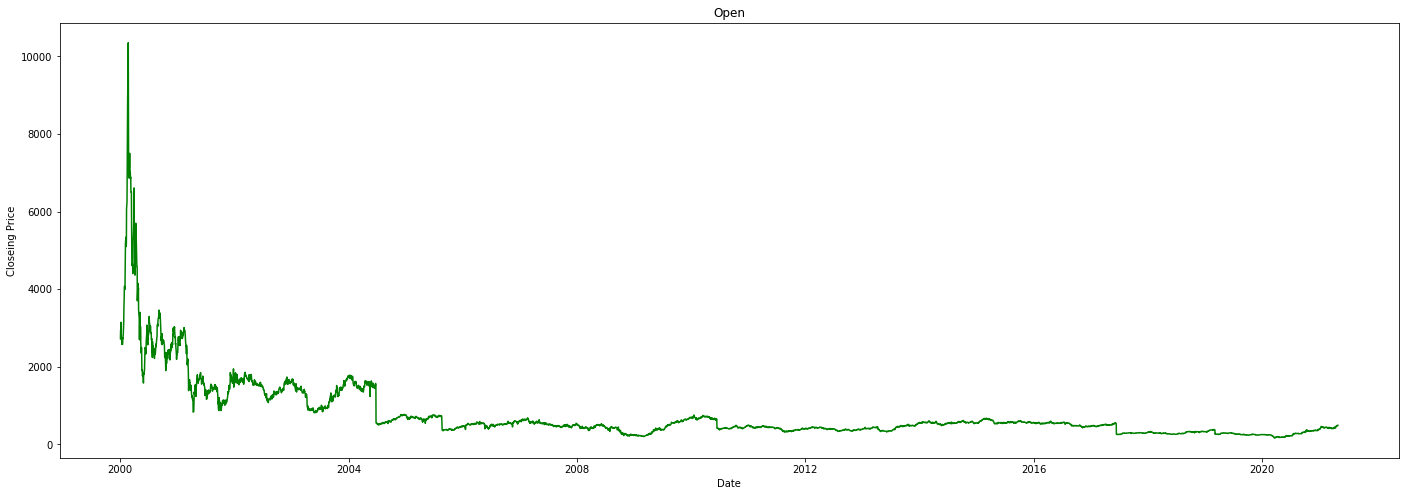

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24, 8))
plt.title('Open')
plt.xlabel('Date')
plt.ylabel('Closeing Price')
plt.plot(df, color = 'green')

plt.show()

In [12]:
train_len = int(len(df) * 0.5)
training_data = df[:train_len]
testing_data = df[train_len:]
print(training_data)
print(testing_data)

               Open
Date               
2000-01-03  2724.00
2000-01-04  2942.15
2000-01-05  2942.15
2000-01-06  3144.70
2000-01-07  2751.00
...             ...
2010-08-11   433.00
2010-08-12   417.85
2010-08-13   413.15
2010-08-16   413.20
2010-08-17   414.00

[2653 rows x 1 columns]
              Open
Date              
2010-08-18  413.25
2010-08-19  422.00
2010-08-20  419.70
2010-08-23  414.00
2010-08-24  413.00
...            ...
2021-04-26  479.40
2021-04-27  481.40
2021-04-28  485.85
2021-04-29  492.70
2021-04-30  491.50

[2653 rows x 1 columns]


In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32036.315, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31971.973, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31982.900, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32034.510, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31953.482, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=31953.119, Time=0.56 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=31886.596, Time=0.76 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=31888.403, Time=1.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=31888.175, Time=1.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=31933.615, Time=4.44 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=31878.990, Time=10.77 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=31880.074, Time=9.75 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=31883.884, Time=4.73 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=31877.127, Time=5.40 sec
 ARIMA(4,1,1)(0,0,

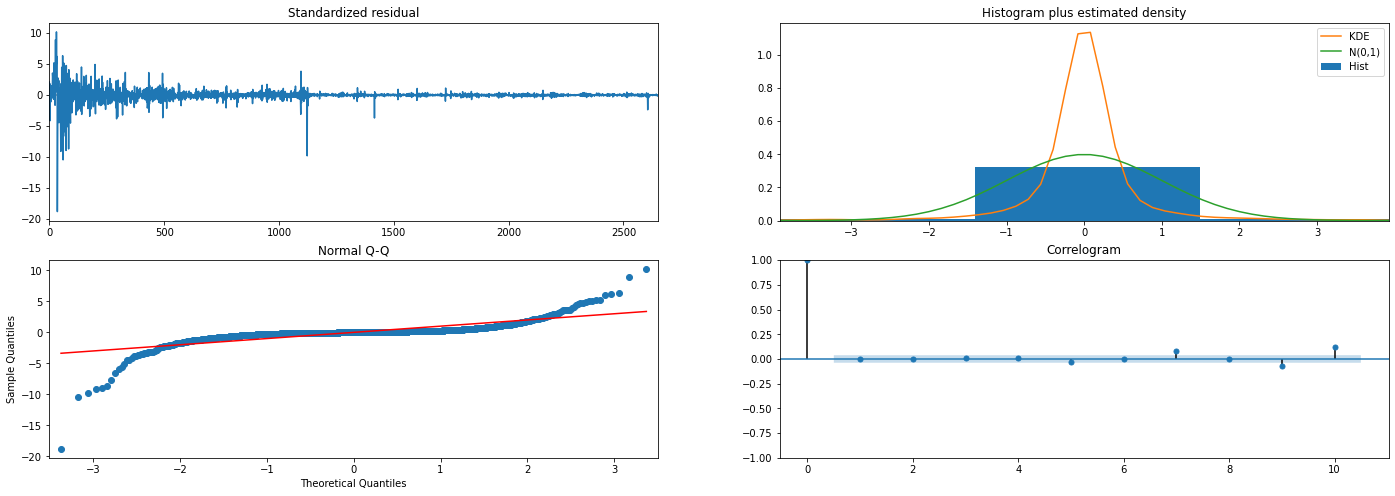

In [14]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(training_data, start_p = 0, d = None, start_q = 0, 
                          max_p = 5, max_d = 5, max_q = 5, start_P = 0, 
                          D = 0, start_Q = 0, max_P = 5, max_D = 5,
                          max_Q = 5, test = 'kpss', seasonal_test = 'ocsb', 
                          error_action = 'warn', trace = True, supress_warnings = True,stepwise = True,
                          random_state = None, n_fits = 50)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize = (24, 8))
plt.show()

In [15]:
model = SARIMAX(training_data['Open'], 
                order = (5, 1, 1))
  
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 2653
Model:               SARIMAX(5, 1, 1)   Log Likelihood              -15931.564
Date:                Fri, 22 Apr 2022   AIC                          31877.127
Time:                        13:23:10   BIC                          31918.309
Sample:                             0   HQIC                         31892.033
                               - 2653                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7768      0.025    -31.086      0.000      -0.826      -0.728
ar.L2          0.2374      0.007     33.764      0.000       0.224       0.251
ar.L3          0.0898      0.008     10.666      0.000       0.073       0.106
ar.L4         -0.1696      0.007    -25.417      0.000      -0.183      -0.157
ar.L5         -0.1228      0.010    -12.735      0.000      -0.142      -0.104
ma.L1          0.9267      0.023     40.026      0.000       0.881       0.972
sigma2      9672.0505     55.350    174.743      0.000    9563.566    9780.535
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            625141.77
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -3.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        77.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
predictions = result.get_forecast(len(testing_data))
predictions = predictions.summary_frame()
predictions.index = testing_data.index

residual = testing_data['Open'] - predictions['mean']
residual = pd.DataFrame(residual, columns = ['resid'])
residual.describe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


,resid
count,2653.000000
mean,-6.086168
std,115.268032
min,-254.755343
25%,-111.555343
50%,-4.905343
75%,97.144657
max,254.394657


Number of values with autocorrelation above 0.9 is :  47


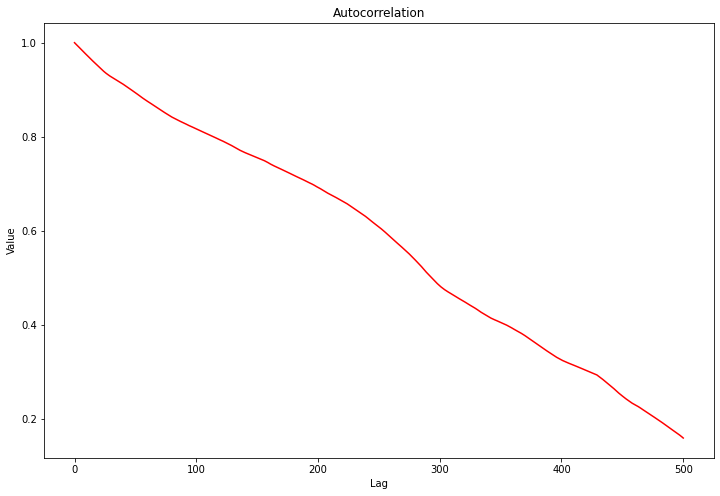

In [17]:
from statsmodels.tsa import stattools

def find_input_dim(data):
    acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(data,
                                                                 adjusted=True,
                                                                 nlags=500,
                                                                 qstat=True,
                                                                 fft=True,
                                                                 alpha = 0.05)

    plt.figure(figsize=(12, 8))
    plt.plot(pd.Series(acf_djia), color = 'r')
    plt.title('Autocorrelation')
    plt.xlabel('Lag')
    plt.ylabel('Value')
    
    input_dim = sum([1 for x in acf_djia if x > 0.9])
    print("Number of values with autocorrelation above 0.9 is : ", input_dim)
    return input_dim

input_dim_hybrid = find_input_dim(residual['resid'])

In [18]:
def create_regressor_attributes(df, attribute, list_of_prev_t_instants) :
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop = True)

    df_copy = df[start : end]
    df_copy.reset_index(inplace = True, drop = True)

    for attribute in attribute :
            foobar = pd.DataFrame()
            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop = True, inplace = True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort = False, axis = 1)
            df_copy = pd.concat([df_copy, foobar], sort = False, axis = 1)
            
    df_copy.set_index(['datetime'], drop = True, inplace = True)
    return df_copy

column_hybrid = ['resid']

n_lags_hybrid = []
for i in range(1, input_dim_hybrid + 1):
    n_lags_hybrid.append(i)

df_new_hybrid = create_regressor_attributes(residual, column_hybrid, n_lags_hybrid)
df_new_hybrid

,resid,resid_(t-1),resid_(t-2),resid_(t-3),resid_(t-4),resid_(t-5),resid_(t-6),resid_(t-7),resid_(t-8),resid_(t-9),...,resid_(t-38),resid_(t-39),resid_(t-40),resid_(t-41),resid_(t-42),resid_(t-43),resid_(t-44),resid_(t-45),resid_(t-46),resid_(t-47)
datetime,,,,,,,,,,,,,,,,,,,,,
2010-10-25,28.646223,45.842890,50.146652,43.142406,53.147198,55.241789,74.147894,70.141003,44.148782,48.140001,...,-20.073361,-19.819186,-17.564330,-17.002528,-9.666029,-5.423414,-4.130895,0.737402,4.374995,-4.213636
2010-10-26,8.193270,28.646223,45.842890,50.146652,43.142406,53.147198,55.241789,74.147894,70.141003,44.148782,...,-17.745910,-20.073361,-19.819186,-17.564330,-17.002528,-9.666029,-5.423414,-4.130895,0.737402,4.374995
2010-10-27,15.145886,8.193270,28.646223,45.842890,50.146652,43.142406,53.147198,55.241789,74.147894,70.141003,...,-10.744432,-17.745910,-20.073361,-19.819186,-17.564330,-17.002528,-9.666029,-5.423414,-4.130895,0.737402
2010-10-28,17.143569,15.145886,8.193270,28.646223,45.842890,50.146652,43.142406,53.147198,55.241789,74.147894,...,-10.774976,-10.744432,-17.745910,-20.073361,-19.819186,-17.564330,-17.002528,-9.666029,-5.423414,-4.130895
2010-10-29,11.645621,17.143569,15.145886,8.193270,28.646223,45.842890,50.146652,43.142406,53.147198,55.241789,...,-15.765572,-10.774976,-10.744432,-17.745910,-20.073361,-19.819186,-17.564330,-17.002528,-9.666029,-5.423414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,61.544657,65.694657,53.744657,58.144657,45.144657,23.844657,1.044657,14.144657,32.144657,25.044657,...,-0.155343,1.844657,12.844657,15.294657,12.444657,18.044657,28.144657,26.744657,22.144657,21.144657
2021-04-27,63.544657,61.544657,65.694657,53.744657,58.144657,45.144657,23.844657,1.044657,14.144657,32.144657,...,5.244657,-0.155343,1.844657,12.844657,15.294657,12.444657,18.044657,28.144657,26.744657,22.144657
2021-04-28,67.994657,63.544657,61.544657,65.694657,53.744657,58.144657,45.144657,23.844657,1.044657,14.144657,...,0.094657,5.244657,-0.155343,1.844657,12.844657,15.294657,12.444657,18.044657,28.144657,26.744657


In [19]:
def create_train_valid_test(data, test_set_size, valid_set_size):
    df_copy = data.reset_index(drop = True)
    
    df_test = df_copy.iloc[int((len(df_copy) * (1 - test_set_size))) : ]
    df_train_plus_valid = df_copy.iloc[ : int((len(df_copy) * (1 - test_set_size)))]
    
    df_train = df_train_plus_valid.iloc[ : int((len(df_train_plus_valid) * (1 - valid_set_size))) ]
    df_valid = df_train_plus_valid.iloc[int((len(df_train_plus_valid) * (1 - valid_set_size))) : ]
    
    X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
    X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
    X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]
    
    print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
    print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
    print('Shape of test inputs, test target:', X_test.shape, y_test.shape)
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid, y_test_hybrid = create_train_valid_test(df_new_hybrid, 0.20, 0.10)

Shape of training inputs, training target: (1875, 47) (1875,)
Shape of validation inputs, validation target: (209, 47) (209,)
Shape of test inputs, test target: (522, 47) (522,)


In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def scale_data(X_train, y_train, X_valid, y_valid, X_test, y_test, scaler):
    X_train_scaled = scaler.fit_transform(np.array(X_train))
    X_valid_scaled = scaler.fit_transform(np.array(X_valid))
    X_test_scaled = scaler.fit_transform(np.array(X_test))
    
    y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
    y_valid_scaled = scaler.fit_transform(np.array(y_valid).reshape(-1, 1))
    y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1, 1))
    
    return X_train_scaled, y_train_scaled, X_valid_scaled, y_valid_scaled, X_test_scaled, y_test_scaled

scaler = MinMaxScaler()

X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid, y_test_hybrid = scale_data(X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid, y_test_hybrid, scaler)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def forecast_HMLP_residuals(input_dim_hybrid, X_train, y_train, X_valid, y_valid, X_test):
    model = Sequential()
    model.add(Dense(input_dim_hybrid, activation = 'tanh', input_dim = input_dim_hybrid))
    model.add(Dense(input_dim_hybrid / 2, activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(
            optimizer=Adam(learning_rate = 0.01),
            loss = "mean_squared_error",
            metrics=["mse", "mae"])
    
    model.summary()
    
    history_hybrid = model.fit(X_train, y_train,
                               validation_data = (X_valid, y_valid),
                               batch_size = 32,
                               epochs = 100, verbose = 1)
    
    pred_HMLP = model.predict(X_test)
    
    return pred_HMLP, history_hybrid

resid_HMLP, history_hybrid = forecast_HMLP_residuals(input_dim_hybrid, X_train_hybrid, y_train_hybrid, X_valid_hybrid, y_valid_hybrid, X_test_hybrid)
resid_HMLP = scaler.inverse_transform(resid_HMLP)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 47)                2256      
                                                                 
 dense_1 (Dense)             (None, 23)                1104      
                                                                 
 dropout (Dropout)           (None, 23)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 24        
                                                                 
Total params: 3,384
Trainable params: 3,384
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.1365 - mse: 0.1365 - mae: 0.2681 - val_loss: 0.0382 - val_mse: 0.0382 - val_mae: 0.1582
Epoch 2/100
59/59 [====

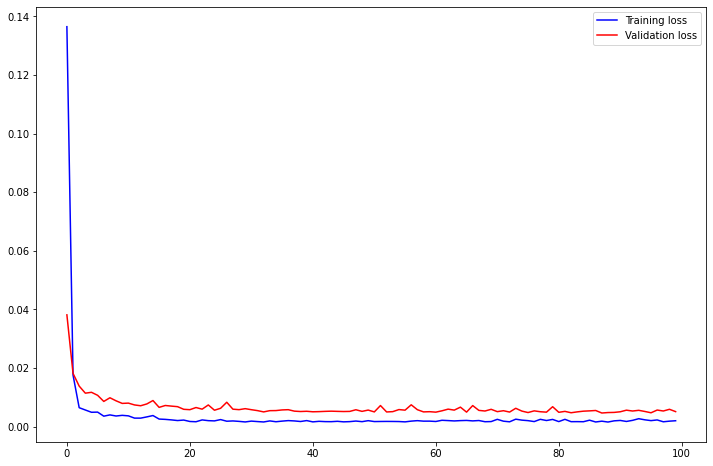

In [22]:
def plot_loss(history):
    plt.figure(figsize = (12, 8))
    history_dict=history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    plt.plot(loss_values,'b', label = 'Training loss')
    plt.plot(val_loss_values,'r',label = 'Validation loss')
    plt.legend()

plot_loss(history_hybrid)

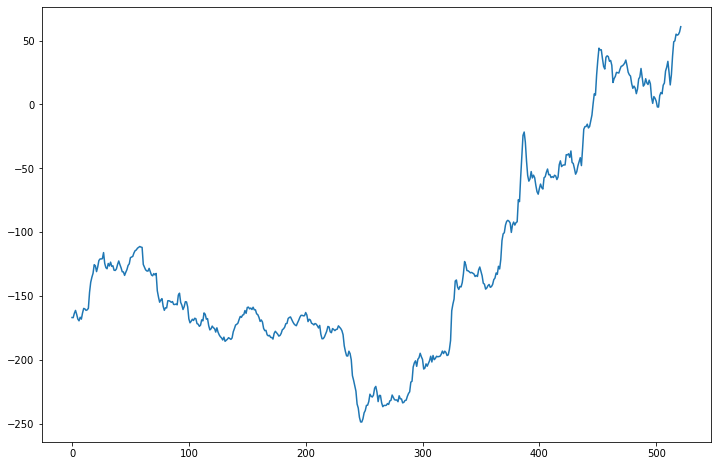

In [23]:
plt.figure(figsize = (12, 8))
plt.plot(resid_HMLP)
plt.show()

In [24]:
pred_hybrid = [a + b for a,b in zip(predictions['mean'], resid_HMLP)]

def equal_size(list1, list2):
    if len(list1) > len(list2):
        s = len(list1)-len(list2)
        list1 = list1[:-s]
        return list1, list2
    if len(list2) > len(list1):
        s = len(list2)-len(list1)
        list2 = list2[:-s]
        return list1, list2
    else:
        return list1, list2

y_test_rescaled, pred_hybrid  = equal_size(scaler.inverse_transform(y_test_hybrid), pred_hybrid)

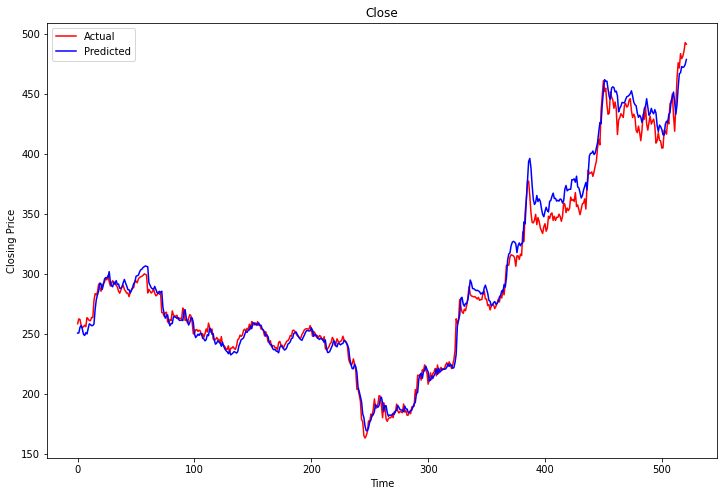

In [25]:
def plot_comparison_graph(actual, prediction):
    y_actual = pd.DataFrame(actual, columns = ['Actual'])
    y_hat = pd.DataFrame(prediction, columns = ['Predicted'])
    
    plt.figure(figsize=(12, 8))
    plt.plot(y_actual, color='r')
    plt.plot(y_hat, color='b')
    
    plt.legend(['Actual', 'Predicted'], loc='best')
    plt.title('Close')
    plt.ylabel('Closing Price')
    plt.xlabel('Time')

    plt.show()
plot_comparison_graph(df[-len(y_test_hybrid):].to_numpy(), pred_hybrid)

In [26]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(df[-len(y_test_hybrid):].to_numpy(), pred_hybrid)
print('Mean Squared Error: ', MSE)    
RMSE = math.sqrt(mean_squared_error(df[-len(y_test_hybrid):].to_numpy(), pred_hybrid))
print('Root Mean Squared Error: ', RMSE)
MAPE = np.mean(np.abs(np.vstack(pred_hybrid) - df[-len(y_test_hybrid):].to_numpy())/np.abs(df[-len(y_test_hybrid):].to_numpy()))
print('MAPE : ', MAPE)

Mean Squared Error:  80.62528992441425
Root Mean Squared Error:  8.979158642345855
MAPE :  0.021540604177573405
